<h1>Model Training</h1>

<h1>1.1 Import data and required packages</h1>

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
#Basic Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#Modelling 
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#from xgboost import VGBRegressor
import warnings

<h1>Import the CSV Data as Pandas DataFrame</h1>

In [4]:
df = pd.read_csv(r'C:\Users\tanve\OneDrive\Desktop\MLProject\notebook\data\raw.csv')

<h1>Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h1>Preparing X and Y variables

In [6]:
X= df.drop(columns=['math_score'], axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [9]:
y = df['math_score']

In [10]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

<h1>Creating Column Transformer with 3 types of transformers

In [1]:
numerical_features= X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [

        ("OneHotEncoder", oh_transformer , categorical_features),
        ("StandardScaler", numeric_transformer , numerical_features)
    ]
)

NameError: name 'X' is not defined

In [12]:
X= preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

<h1> Separating dataset into train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

<h1>Create an Evaluate Function to give all metrics after model Training

In [29]:
def evaluate_model(true,predicted):
    mae= mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2_scr = r2_score(true,predicted)
    return mae, rmse, r2_scr

In [30]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Cat Boost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Store model names, r2 scores
model_names = list(models.keys())  # Store names separately
r2_list = []

# Iterate over models
for i in range(len(model_names)):
    model = models[model_names[i]]  # Get model instance
    model.fit(X_train, y_train)  # Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluating train and test dataset 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print model name
    print(f" {model_names[i]}")

    # Print training performance
    print('Model Performance for Training set:')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
    
    print("--------------------------------------")

    # Print test performance
    print('Model Performance for Test set:')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")

    # Store R2 score
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')


 Linear Regression
Model Performance for Training set:
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
--------------------------------------
Model Performance for Test set:
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


 Lasso
Model Performance for Training set:
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
--------------------------------------
Model Performance for Test set:
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


 Ridge
Model Performance for Training set:
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
--------------------------------------
Model Performance for Test set:
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


 K-Neighbors Regressor
Model Performance for Training set:
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555


<h1>Results 

In [32]:
pd.DataFrame(list(zip(model_names, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
6,Cat Boost Regressor,0.851632
7,AdaBoost Regressor,0.851286
5,Random Forest Regressor,0.848933
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.718992


<h1>Plot y_pred and y_test

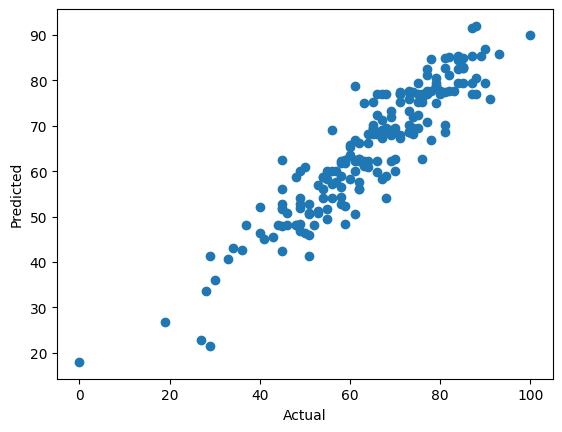

In [33]:
plt.scatter(y_test, y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

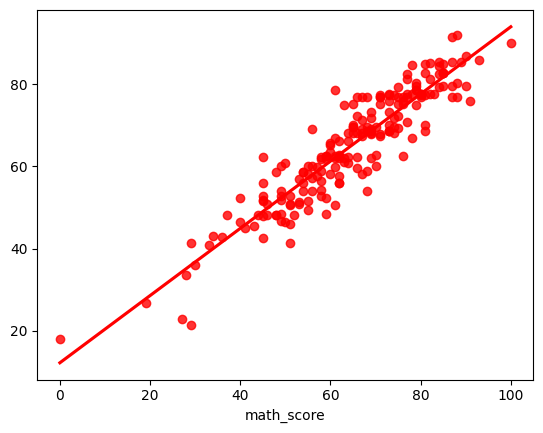

In [34]:
sns.regplot(x=y_test , y=y_test_pred, ci=None, color='red');

<h1>Difference between Actual and Predicted Values

In [36]:
pred_df= pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_test_pred, 'Difference':y_test-y_test_pred})

In [37]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,75.897727,15.102273
737,53,57.058824,-4.058824
740,80,77.496815,2.503185
660,74,77.496815,-3.496815
411,84,84.375000,-0.375000
...,...,...,...
408,52,48.245763,3.754237
332,62,57.714844,4.285156
208,74,68.242604,5.757396
613,65,68.242604,-3.242604
